In [71]:
import pandas as pd
from darts import TimeSeries
from darts.models import KalmanForecaster

df = pd.read_csv('..\\..\\Dataset\\testes\\casos_diarios_2024.csv', parse_dates=['dt_notificacao']).loc[:, ['dt_notificacao', 'casos']]

In [72]:
df

,dt_notificacao,casos
0,2024-01-01,139
1,2024-01-02,439
2,2024-01-03,681
3,2024-01-04,802
4,2024-01-05,900
...,...,...
246,2024-09-03,1055
247,2024-09-04,1013
248,2024-09-05,940
249,2024-09-06,681


In [109]:
# Ordenar os dados pela data
#df = df.sort_values('dt_notificacao')

# Converter para uma série temporal do Darts
train = df.where(df['dt_notificacao'] <= '2024-06-01').dropna(subset=["dt_notificacao"])


series = TimeSeries.from_dataframe(train,time_col='dt_notificacao', value_cols=['casos'], freq='D')
hist   = TimeSeries.from_dataframe(df,time_col='dt_notificacao', value_cols=['casos'], freq='D')

<Axes: xlabel='dt_notificacao'>

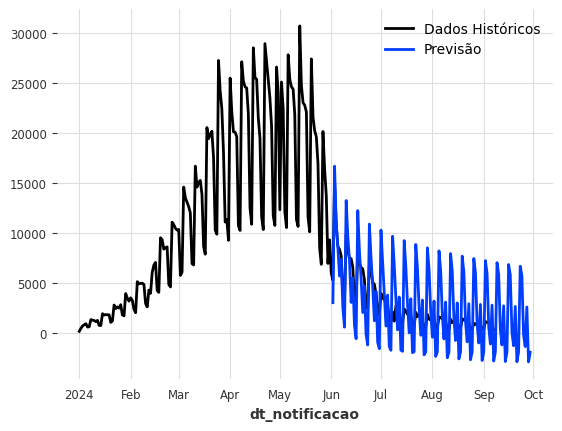

In [126]:
# Inicializar o KalmanFilter
model = KalmanForecaster(dim_x=15)

# Ajustar o modelo aos dados históricos
model.fit(series)

forecast = model.predict(120)

# Mostrar a previsão
#print(forecast)

# Plotar a série original e a previsão
hist.plot(label='Dados Históricos')
forecast.plot(label='Previsão')


In [41]:
from darts.metrics import mape

error = mape(hist, forecast)

print(error)

237.05304950074253
